About This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

Attribute Information:

1.age = age in years

2.sex= (1 = male; 0 = female)

3.cp = chest pain type

4.trestbpsr = esting blood pressure (in mm Hg on admission to the hospital)

5.chol = serum cholestoral in mg/dl

6.fbs = (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

7.restecg = resting electrocardiographic results

8.thalach = maximum heart rate achieved

9.exang = exercise induced angina (1 = yes; 0 = no)

10.oldpeak = ST depression induced by exercise relative to rest

11.slope = the slope of the peak exercise ST segment

12.ca = number of major vessels (0-3) colored by flourosopy

13.thal = 3 = normal; 6 = fixed defect; 7 = reversable defect

14.target = 1 or 0

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


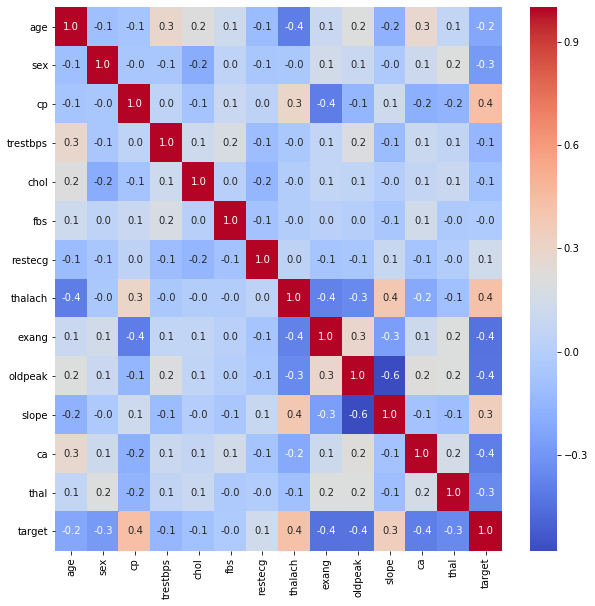

In [6]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, fmt='.1f', cmap='coolwarm')

In [7]:
>>> import matplotlib
>>> matplotlib.__version__

'3.1.2'

In [14]:
#age analysis
df.age.value_counts()

58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
64    10
41    10
63     9
67     9
55     8
45     8
42     8
53     8
61     8
65     8
43     8
66     7
50     7
48     7
46     7
49     5
47     5
39     4
35     4
68     4
70     4
40     3
71     3
69     3
38     3
34     2
37     2
77     1
76     1
74     1
29     1
Name: age, dtype: int64

Text(0.5, 1.0, 'Age Analysis')

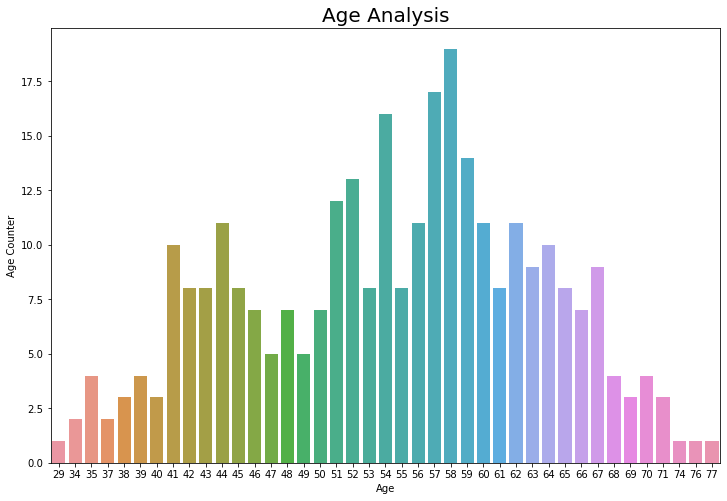

In [21]:
plt.figure(figsize=(12,8))
sns.barplot(x=df.age.value_counts().index, y=df.age.value_counts().values)
plt.xlabel('Age',fontsize=10)
plt.ylabel('Age Counter',fontsize=10)
plt.title('Age Analysis',fontsize=20)

In [22]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [27]:
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])

In [41]:
print('Percentage of patients don\'t have heart disease {:.2f}%'.format(countNoDisease/len(df.target)*100))
print('Percentage of patients have heart disease {:.2f}%'.format(countHaveDisease/len(df.target)*100))

Percentage of patients don't have heart disease 45.54%
Percentage of patients have heart disease 54.46%


In [61]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [42]:
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])

In [44]:
print('% of Female Patients: {:.2f}%'.format(countFemale/len(df.sex)*100))
print('% of Male Patients: {:.2f}%'.format(countMale/len(df.sex)*100))

% of Female Patients: 31.68%
% of Male Patients: 68.32%


In [49]:
young_ages = df[(df.age>=29) & (df.age<40)]
middle_ages = df[(df.age>=40) & (df.age<55)]
elderly_ages = df[(df.age>=55)]
print('young_ages (29 - 39)', len(young_ages))
print('young_ages (40 - 54)', len(middle_ages))
print('young_ages (55 and +)', len(elderly_ages))

young_ages (29 - 39) 16
young_ages (40 - 54) 128
young_ages (55 and +) 159


([<matplotlib.patches.Wedge at 0x176c87f3888>,
 [Text(1.0848984701340476, 0.1816461106129255, 'young ages'),
  Text(-0.09681814799036995, 1.0957309187112112, 'middle ages'),
  Text(-0.08545205258520393, -1.096675862189451, 'elderly_ages')])

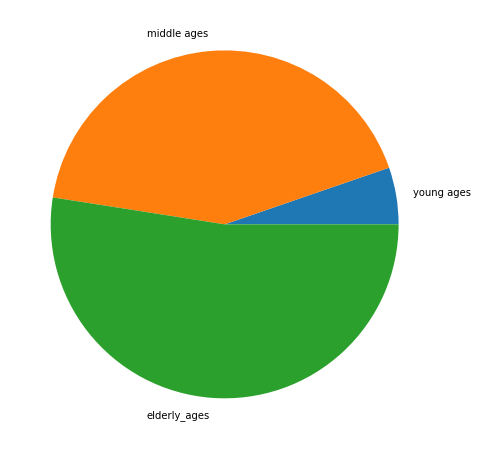

In [58]:
plt.figure(figsize = (8,8))
plt.pie([len(young_ages),len(middle_ages),len(elderly_ages)], labels=['young ages', 'middle ages', 'elderly_ages'],)

In [59]:
#chest pain analysis
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [76]:
cp_0 = len(df[df.cp == 0])
cp_1 = len(df[df.cp == 1])
cp_2 = len(df[df.cp == 2])
cp_3 = len(df[df.cp == 3])
print('% of chest pain type 0 is {:.2f}%'.format(cp_0/len(df.cp)*100))
print('% of chest pain type 1 is {:.2f}%'.format(cp_1/len(df.cp)*100))
print('% of chest pain type 2 is {:.2f}%'.format(cp_2/len(df.cp)*100))
print('% of chest pain type 3 is {:.2f}%'.format(cp_3/len(df.cp)*100))

% of chest pain type 0 is 47.19%
% of chest pain type 1 is 16.50%
% of chest pain type 2 is 28.71%
% of chest pain type 3 is 7.59%


([<matplotlib.patches.Wedge at 0x176c99f1988>,
 [Text(0.09681809669550348, 1.0957309232435946, 'chest pain type_0'),
  Text(-1.0362376928961174, -0.3690683457319687, 'chest pain type_1'),
  Text(0.20970330449306845, -1.0798261545659504, 'chest pain type_2'),
  Text(1.0688703878101182, -0.2598385923273283, 'chest pain type_3')])

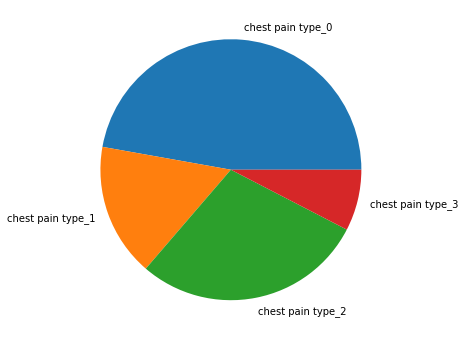

In [74]:
plt.figure(figsize = (6,6))
plt.pie([cp_0, cp_1, cp_2, cp_3], labels=['chest pain type_0', 'chest pain type_1', 'chest pain type_2', 'chest pain type_3'])

In [77]:
df.target.unique()

array([1, 0], dtype=int64)

In [78]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

Text(0.5, 1.0, 'Target 1 & 0')

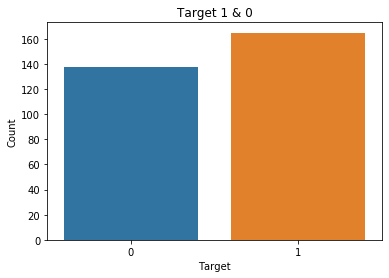

In [80]:
sns.countplot(df.target)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Target 1 & 0')

In [81]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [82]:
# Model Building  Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
x_data = df.drop(['target'], axis=1)
y = df.target.values

In [10]:
x_train, x_test, y_train, y_test = train_test_split (x_data, y, test_size=0.2, random_state=0)

In [90]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [91]:
print('Test Accuracy {:.2f}%'.format(lr.score(x_test, y_test)*100))

Test Accuracy 85.25%


In [92]:
# Logistic Regression Test Accuracy 85.25%

In [93]:
#KNN model

In [94]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
print('KNN accuracy: {:.2f}%'.format(knn.score(x_test, y_test)*100))

KNN accuracy: 63.93%


In [95]:
# KNN accuracy: 63.93%

In [97]:
# support vector
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(x_train, y_train)
svm.score(x_test, y_test)

0.5901639344262295

In [98]:
print('SVC accuracy: {:.2f}%'.format(svm.score(x_test, y_test)*100))

SVC accuracy: 59.02%


In [99]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
print('NB accuracy: {:.2f}%'.format(nb.score(x_test, y_test)*100))

NB accuracy: 85.25%


In [101]:
# Random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train, y_train)
print('Random Forest accuracy: {:.2f}%'.format(rf.score(x_test, y_test)*100))

Random Forest accuracy: 85.25%


In [11]:
# XG boost
import xgboost
xg = xgboost.XGBClassifier()
xg.fit(x_train, y_train)
print('XGboost accuracy: {:.2f}%'.format(xg.score(x_test, y_test)*100))

XGboost accuracy: 85.25%
